In [ ]:
!pip install pandas_ta

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 115 kB 12.4 MB/s 
  Created wheel for pandas-ta: filename=pandas_ta-0.3.14b0-py3-none-any.whl size=218923 sha256=7a3c505e8e2c05abb4a048072004f88dd969d1b668200d2a32d8166e073d3985
  Stored in directory: /root/.cache/pip/wheels/0b/81/f0/cca85757840e4616a2c6b9fe12569d97d324c27cac60724c58
Successfully built pandas-ta


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving BTC-USD (2).csv to BTC-USD (2).csv


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random
import missingno as msno
from google.colab import data_table
from tabulate import tabulate
import scipy.stats as st
import matplotlib.patches as mpl_patches
import warnings
warnings.filterwarnings("ignore")
from scipy.stats import describe
import matplotlib.cm as cm
import matplotlib.lines as mlines
from pandas.core.window.rolling import Rolling
import pandas_ta as ta

In [ ]:
final_df = pd.read_csv('BTC-USD (2).csv')
final_df


Date          Open          High           Low         Close  \
0     2014-10-08    336.115997    354.364014    327.187988    352.940002   
1     2014-10-09    352.747986    382.726013    347.687012    365.026001   
2     2014-10-10    364.687012    375.066986    352.963013    361.562012   
3     2014-10-11    361.362000    367.191010    355.950989    362.299011   
4     2014-10-12    362.605988    379.433014    356.144012    378.549011   
...          ...           ...           ...           ...           ...   
2918  2022-10-04  19623.583984  20380.343750  19523.839844  20336.843750   
2919  2022-10-05  20335.900391  20343.748047  19801.800781  20160.716797   
2920  2022-10-06  20161.039063  20408.392578  19900.087891  19955.443359   
2921  2022-10-07  19957.558594  20041.085938  19395.792969  19546.849609   
2922  2022-10-08  19537.158203  19599.453125  19460.628906  19496.669922   

         Adj Close       Volume  
0       352.940002     54736300  
1       365.026001     83641104  
2       361.562012     43665700  
3       362.299011     13345200  
4       378.549011     17552800  
...            ...          ...  
2918  20336.843750  35887278685  
2919  20160.716797  33223790572  
2920  19955.443359  34711412966  
2921  19546.849609  29227315390  
2922  19496.669922  19980466176  

[2923 rows x 7 columns]

In [ ]:
def feature_smoothening(df,feature_name,smoothening_type,smoothening_range=[7,30,90],show_plot=False,show_original_Feature_in_plot=True):
    if smoothening_type == 'sma':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.sma(df[feature_name],j) 

    elif smoothening_type == 'var':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.variance(df[feature_name],j)

    elif smoothening_type == 'stdev':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.stdev(df[feature_name],j)
    
    elif smoothening_type == 'ema':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.ema(df[feature_name],j)

    elif smoothening_type == 'wma':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.wma(df[feature_name],j)

    elif smoothening_type == 'rsi':
        for j in smoothening_range:
             df[f'{smoothening_type}{j} {feature_name}'] = ta.rsi(df[feature_name],j)

    elif smoothening_type == 'roc':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.roc(df[feature_name],j)  

    elif smoothening_type == 'dema':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.dema(df[feature_name],j) 

    elif smoothening_type == 'tema':
        for j in smoothening_range:
            df[f'{smoothening_type}{j} {feature_name}'] = ta.tema(df[feature_name],j) 

    elif smoothening_type == 'bband_lower':
        for j in smoothening_range:
            bband_df = ta.bbands(df[feature_name],j)
            df[f'{smoothening_type}{j} {feature_name}'] = bband_df[f'BBL_{j}_2.0']

    elif smoothening_type == 'bband_upper':
        for j in smoothening_range:
            bband_df = ta.bbands(df[feature_name],j)
            df[f'{smoothening_type}{j} {feature_name}'] = bband_df[f'BBU_{j}_2.0']

    elif smoothening_type == 'macd':
        macd_df = ta.macd(df[feature_name])
        df[f'{smoothening_type} hist {feature_name}'] = macd_df['MACDh_12_26_9']
        df[f'{smoothening_type} signal {feature_name}'] = macd_df['MACDs_12_26_9']
        df[f'{smoothening_type} {feature_name}'] = macd_df['MACD_12_26_9']

    
    if show_plot == True and show_original_Feature_in_plot==True :
        df[[feature_name]+[i for i in list(df.columns) if i.split(" ")[-1] == feature_name and i.split(" ")[0][0:len(smoothening_type)] == smoothening_type]].plot(kind='line',figsize=(25,5))
        plt.grid()
        plt.title(f'Feature Smoothening-{feature_name} by {smoothening_type}')
        plt.xticks([])
        plt.show()

    elif show_plot == True and show_original_Feature_in_plot==False :
        df[[i for i in list(df.columns) if i.split(" ")[-1] == feature_name and i.split(" ")[0][0:len(smoothening_type)] == smoothening_type]].plot(kind='line',figsize=(25,5))
        plt.grid()
        plt.title(f'Feature Smoothening-{feature_name} by {smoothening_type}')
        plt.xticks([])
        plt.show()

In [ ]:
feature_list = [i for i in list(final_df.columns) if i not in ['Date','Close']]

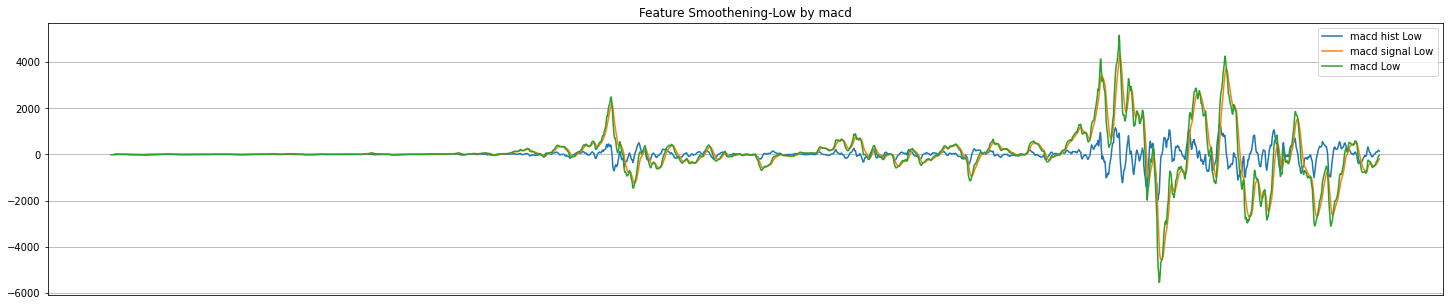

In [ ]:
feature_smoothening(final_df,'Low','macd',show_plot=True,show_original_Feature_in_plot=False)

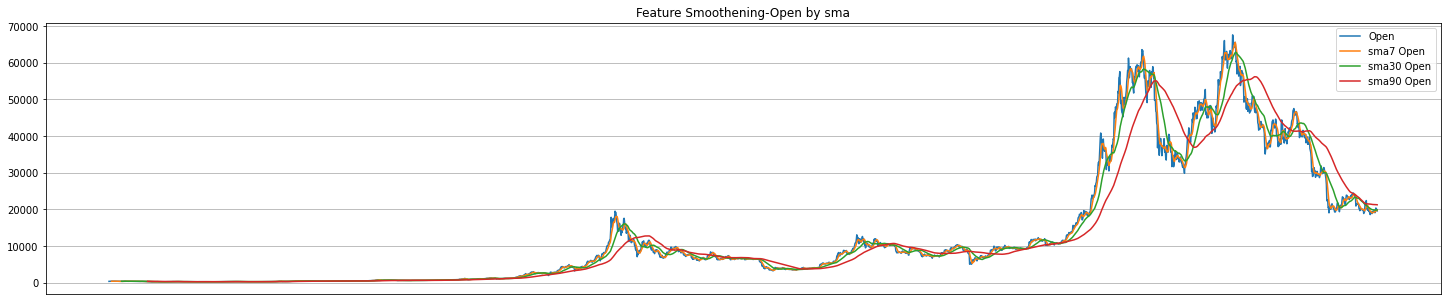

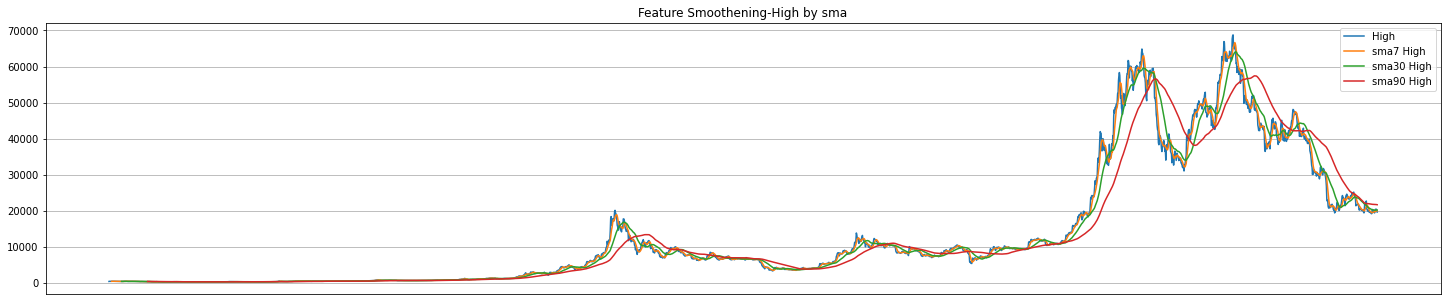

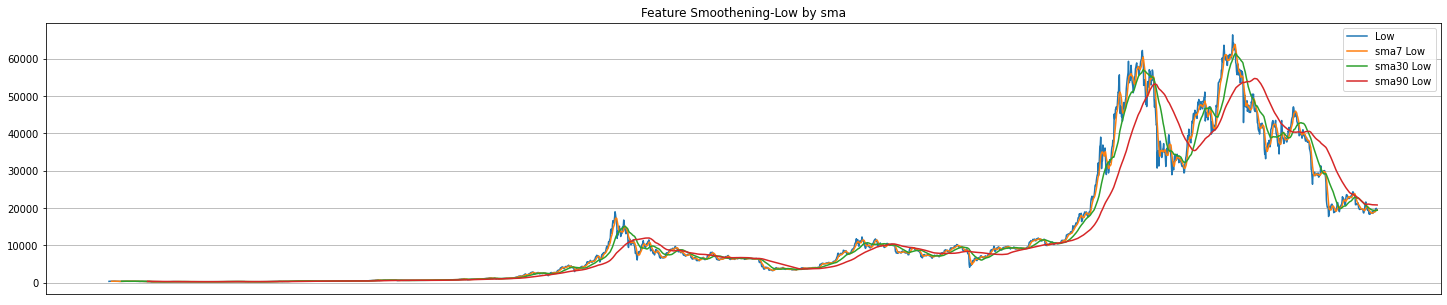

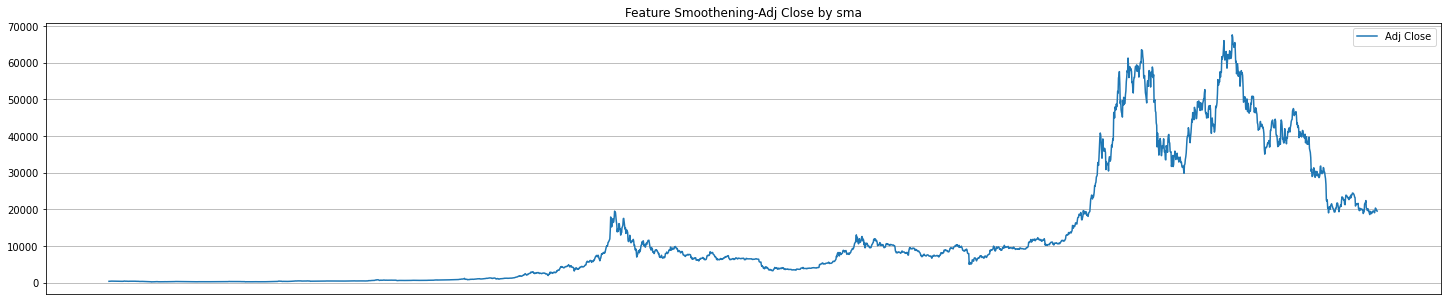

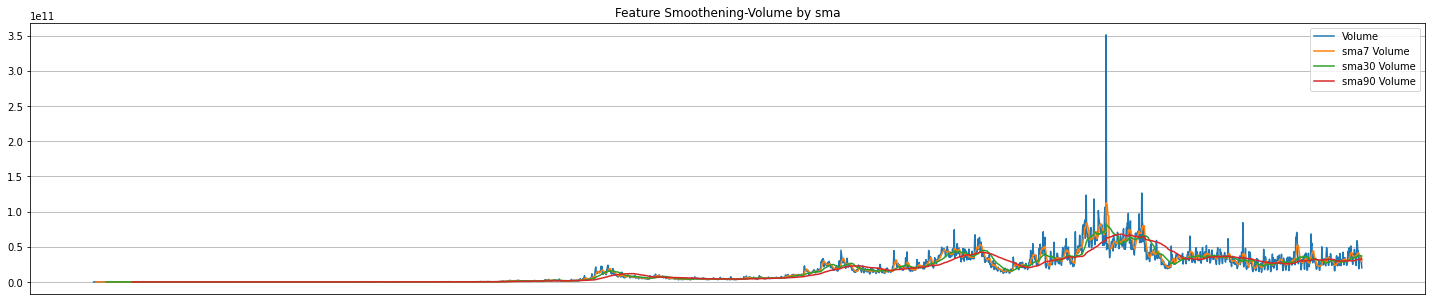

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'sma',show_plot=True)
    

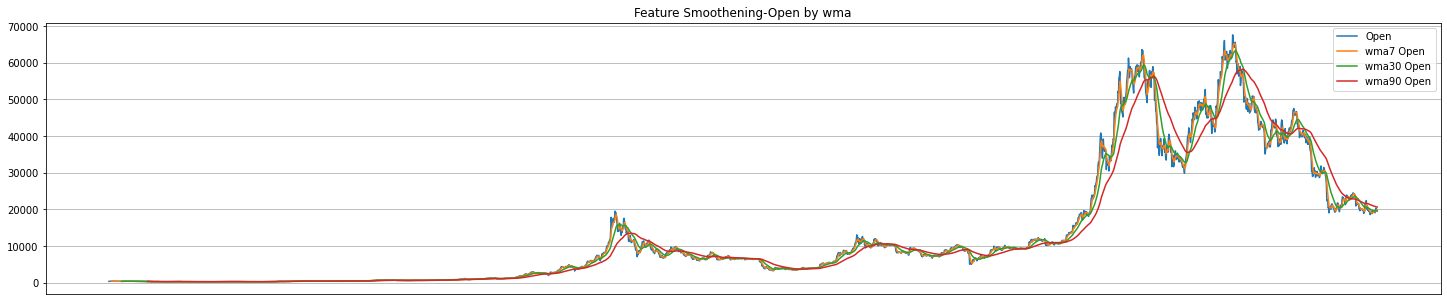

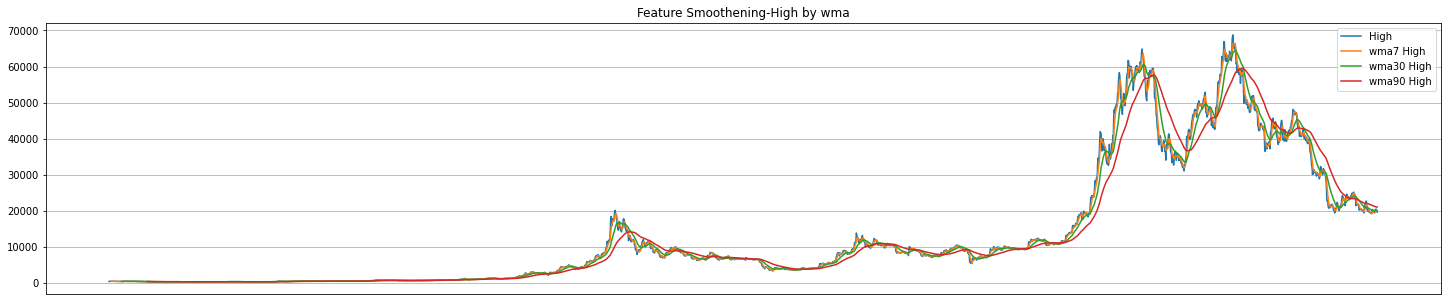

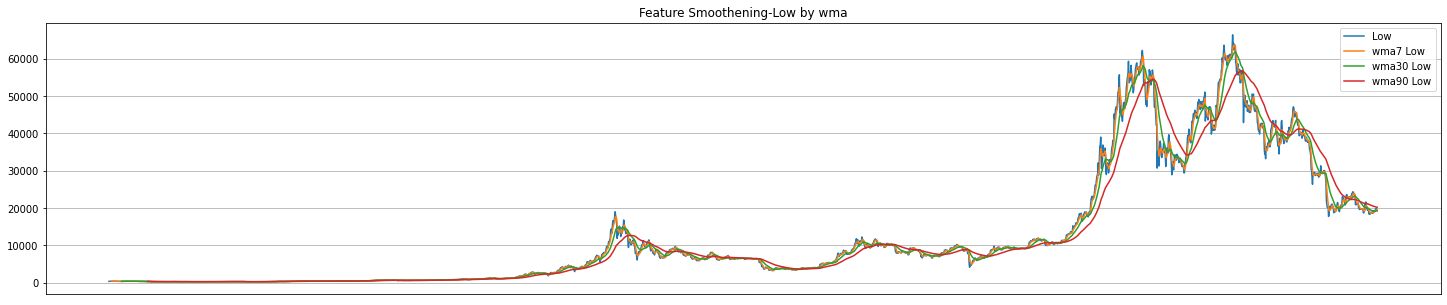

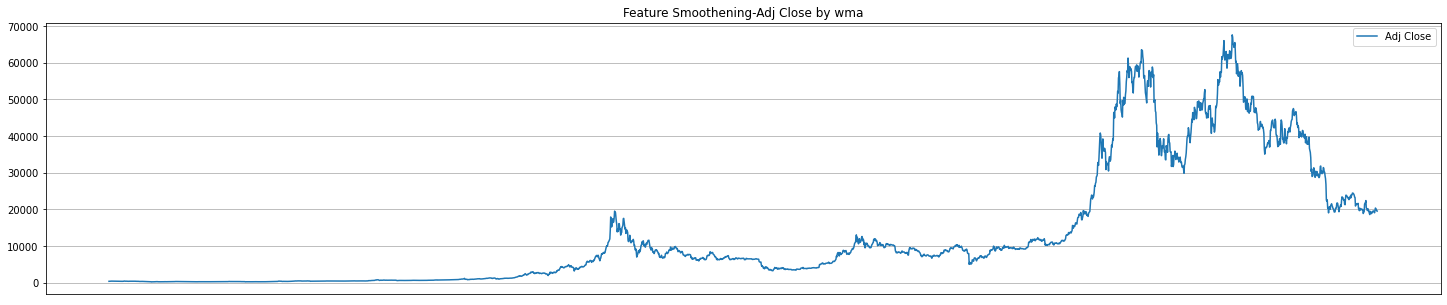

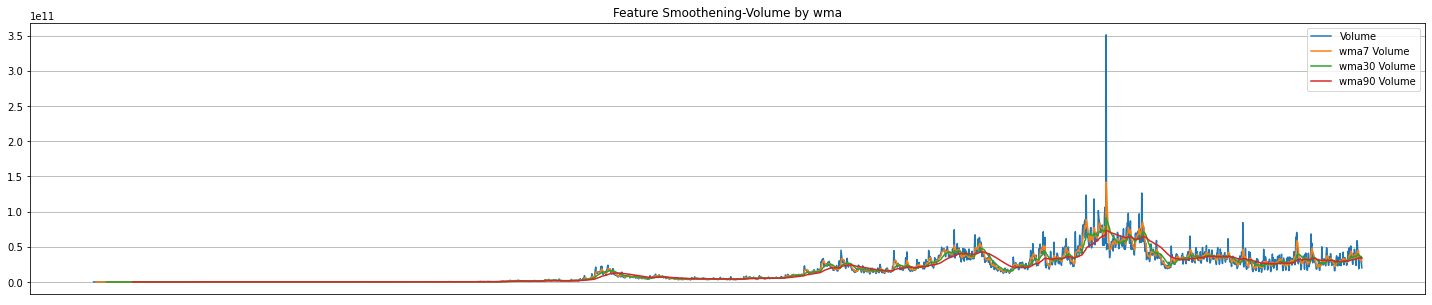

In [ ]:


for feature in feature_list:
    feature_smoothening(final_df,feature,'wma',show_plot=True)

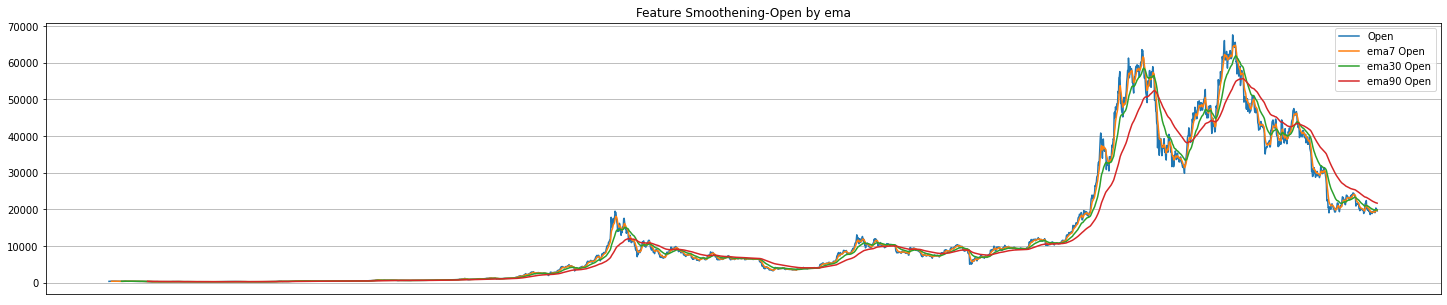

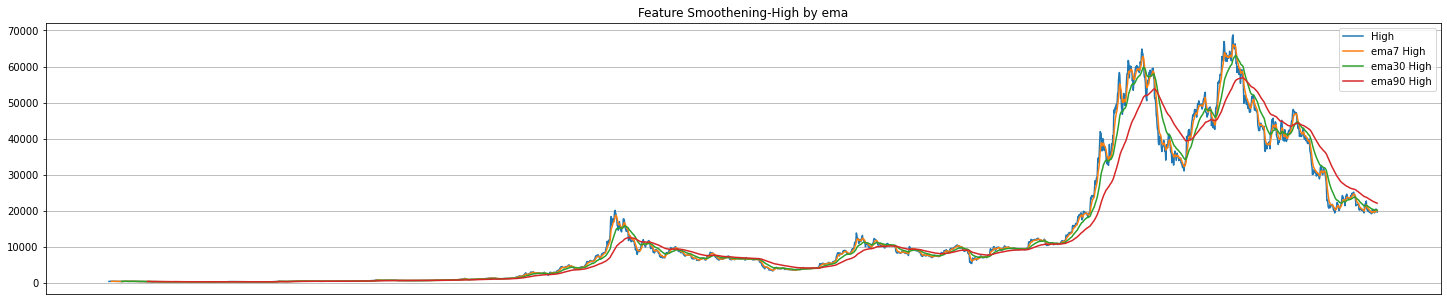

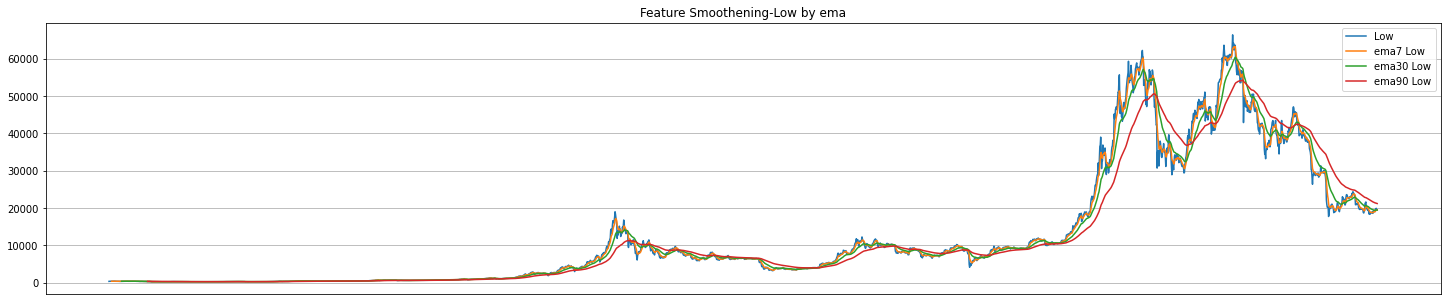

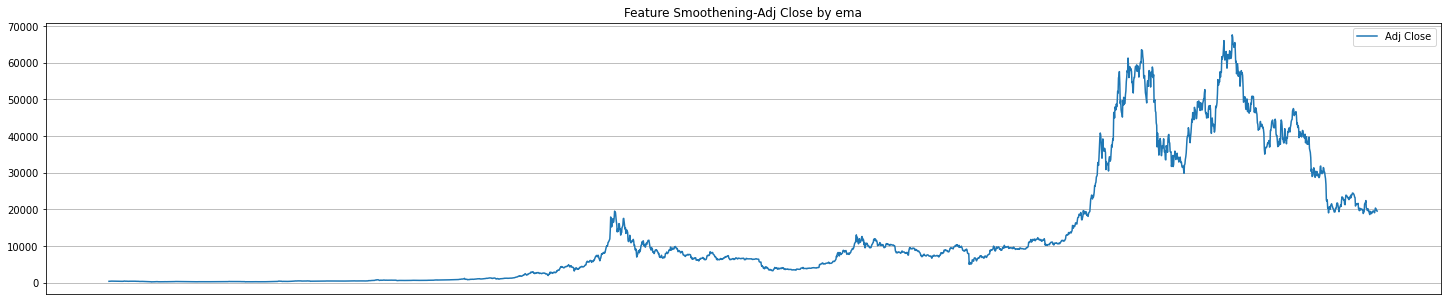

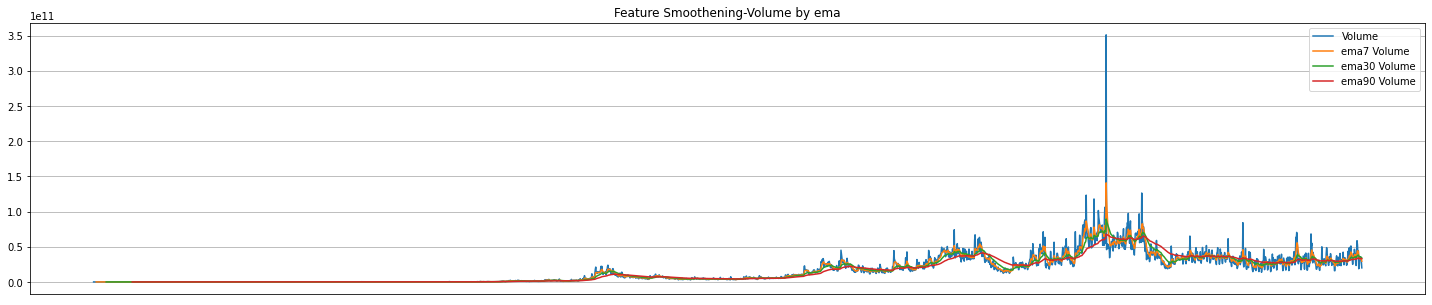

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'ema',show_plot=True)

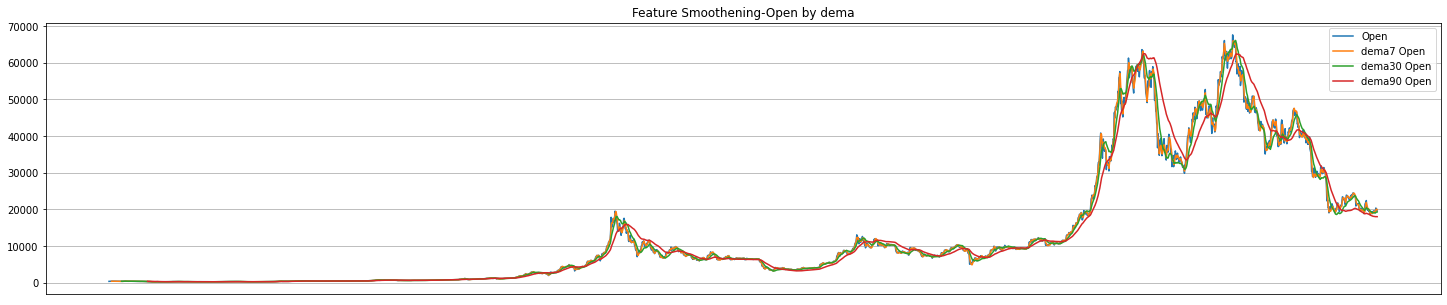

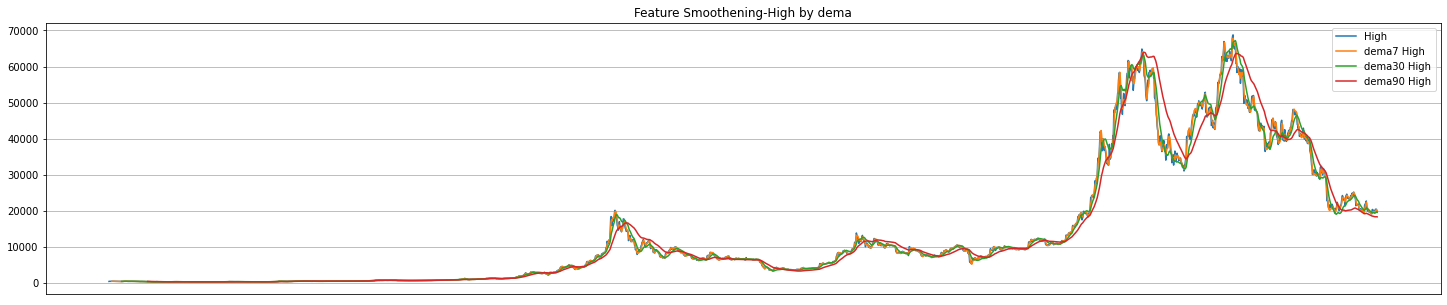

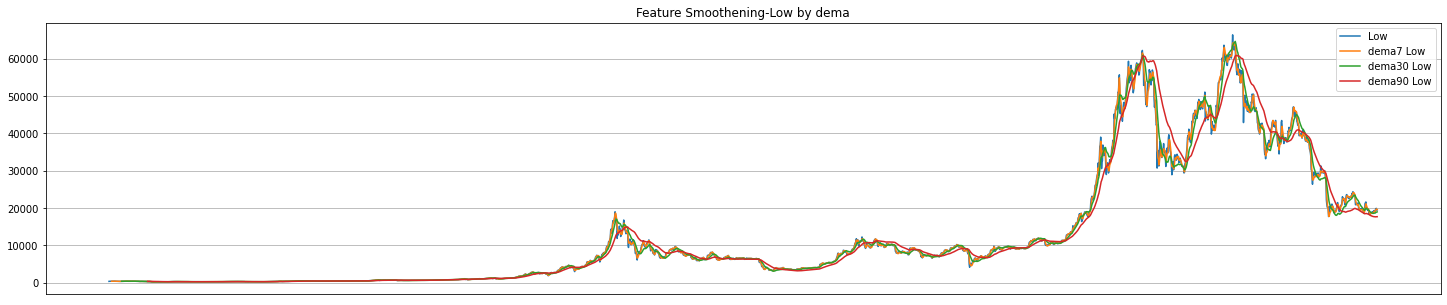

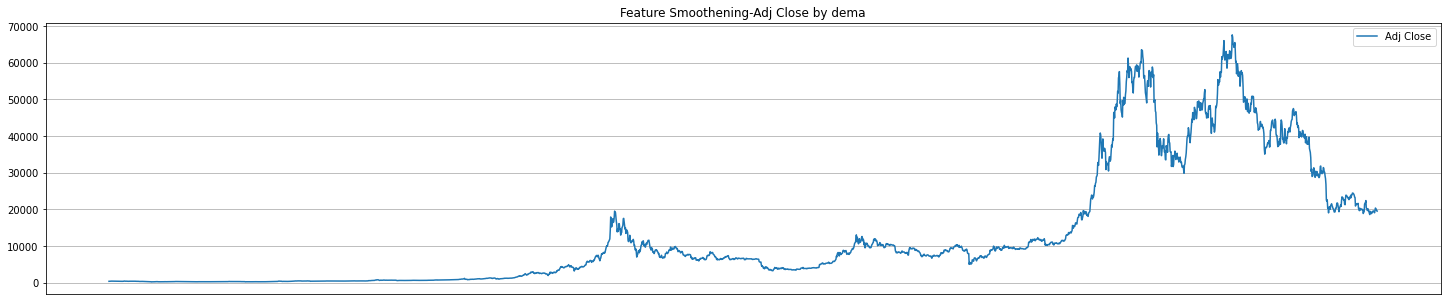

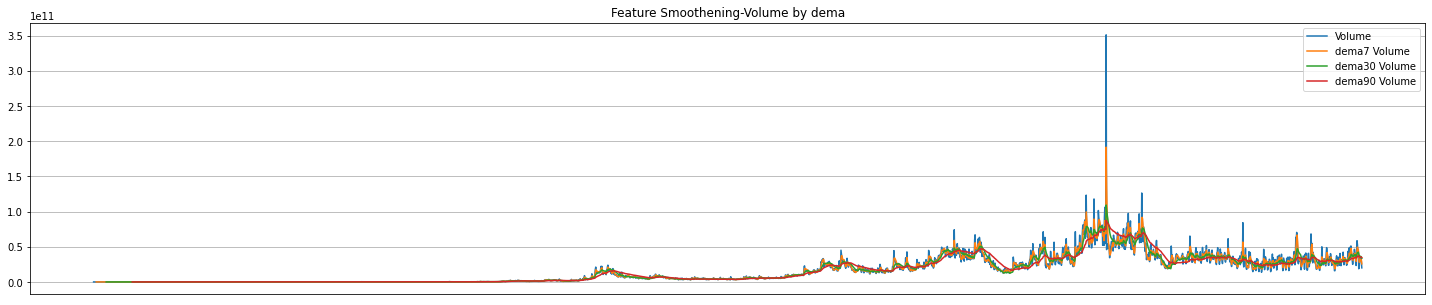

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'dema',show_plot=True)

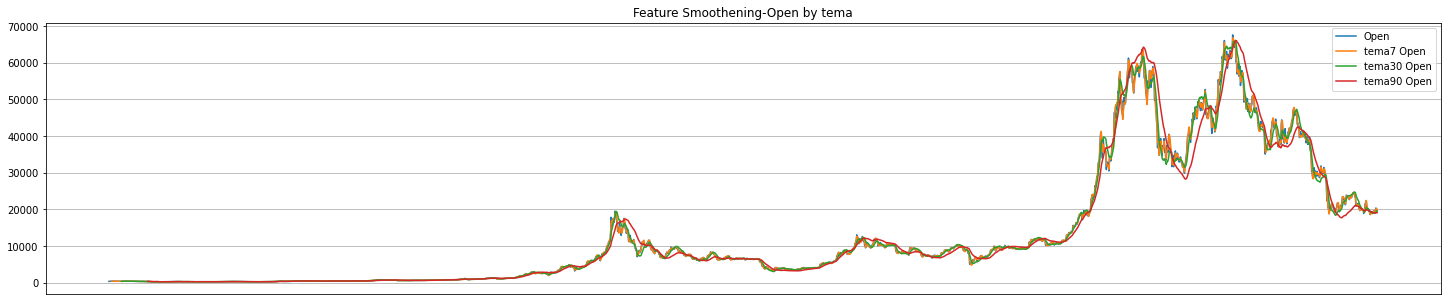

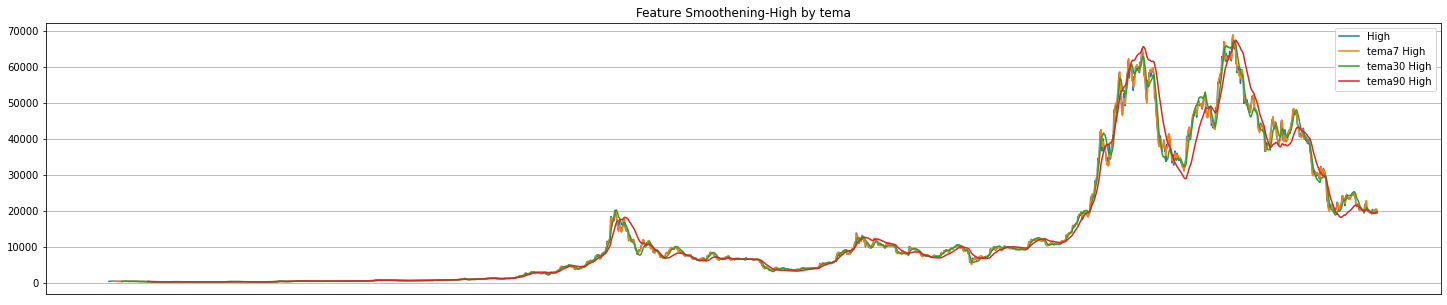

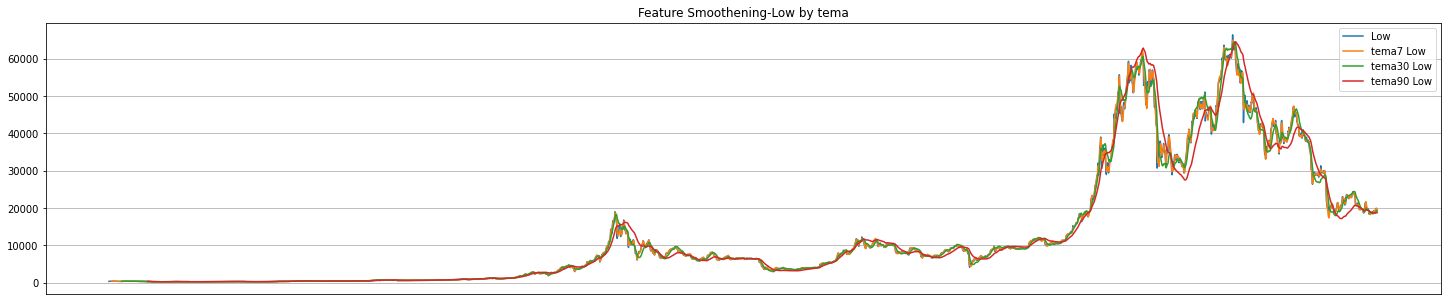

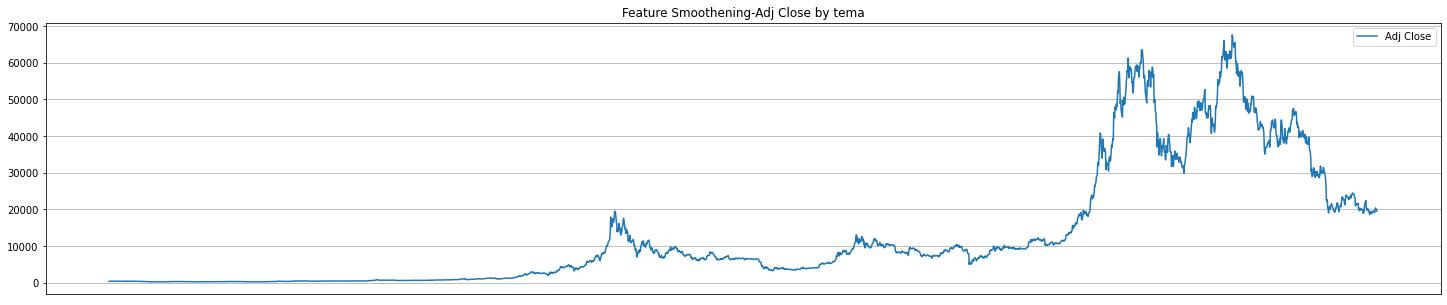

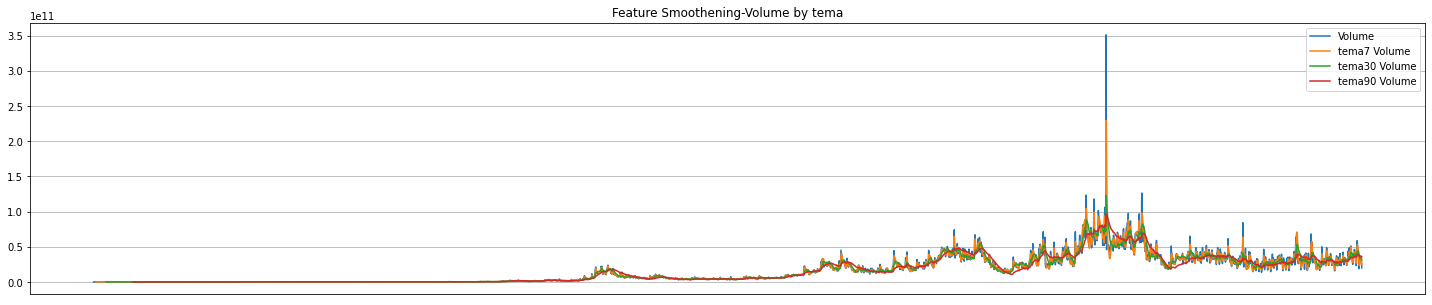

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'tema',show_plot=True)

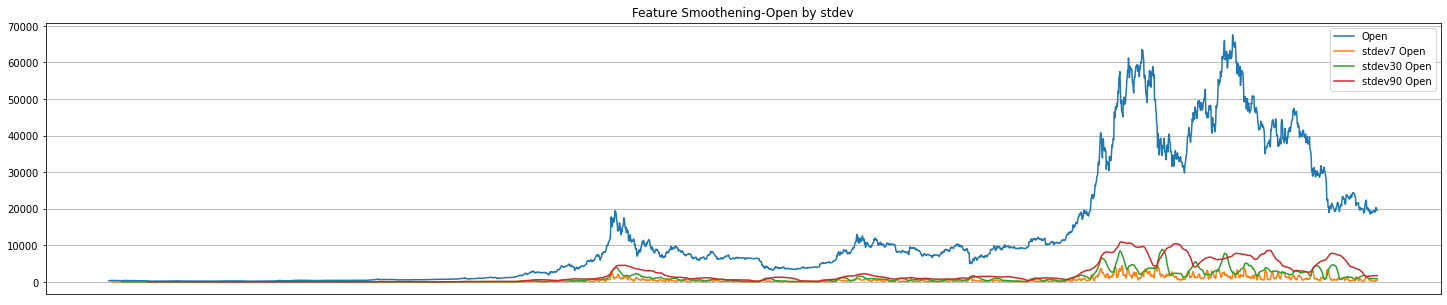

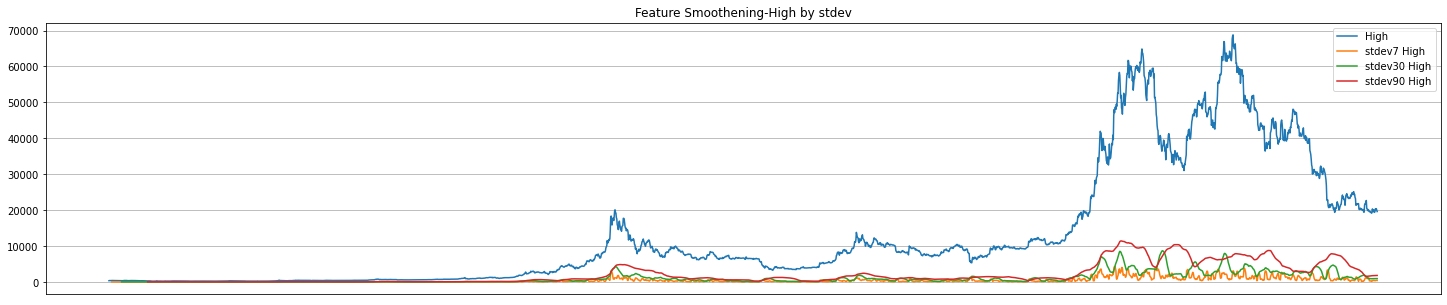

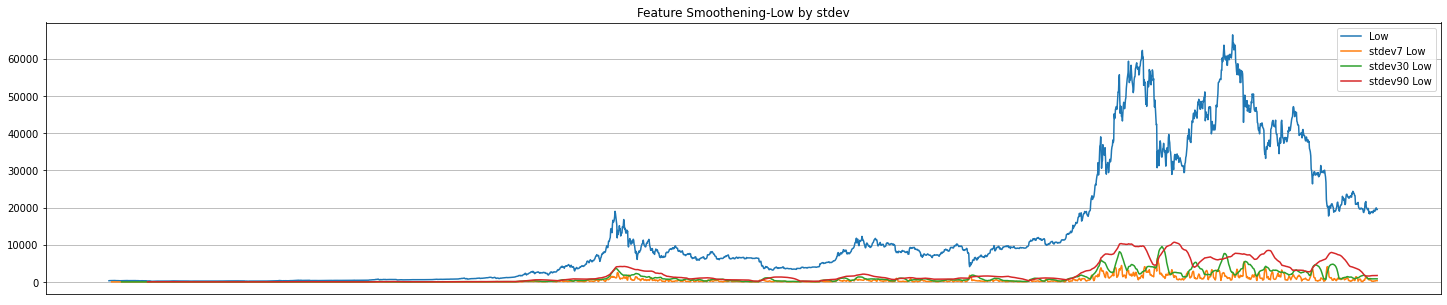

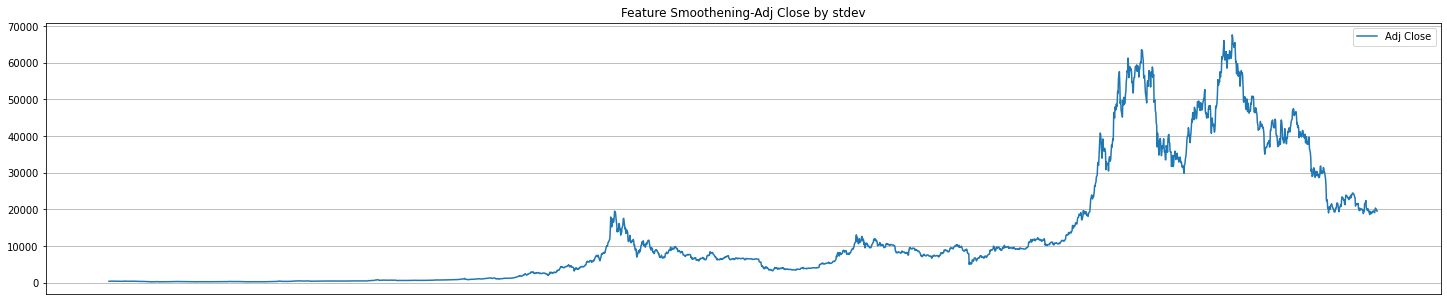

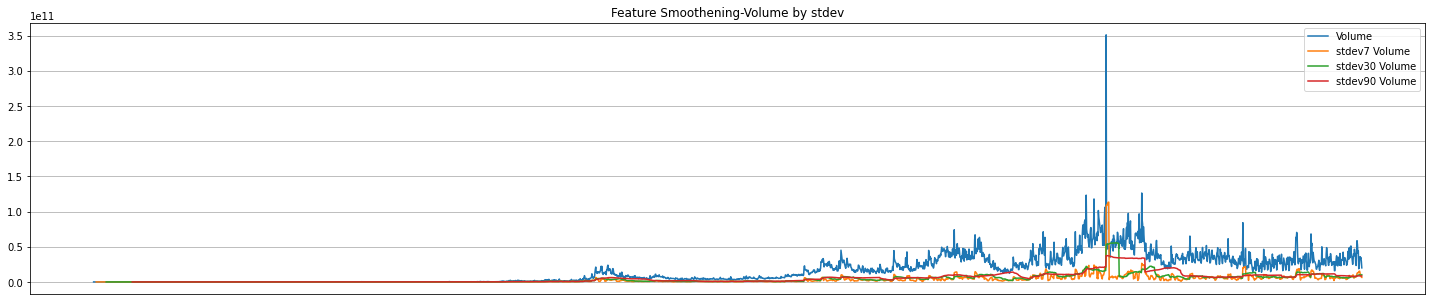

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'stdev',show_plot=True)

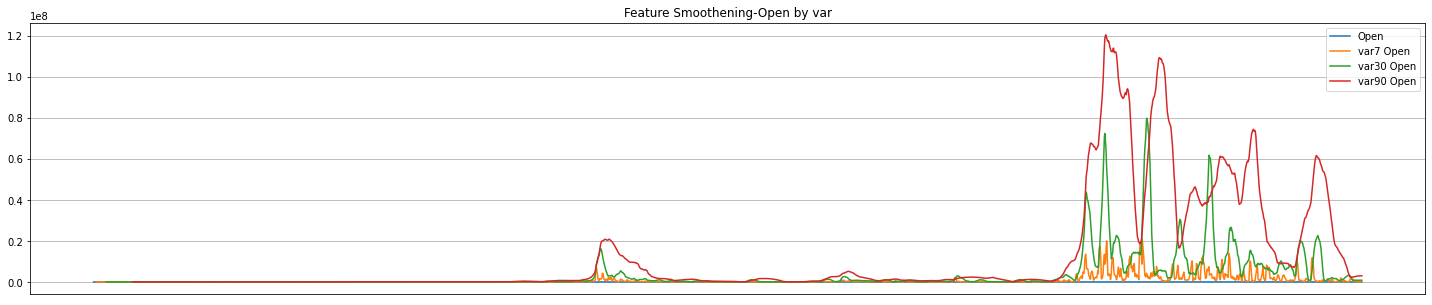

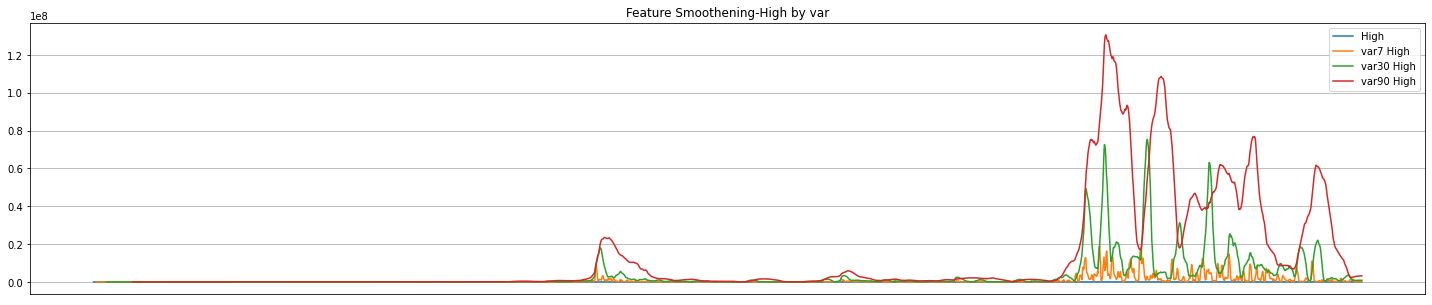

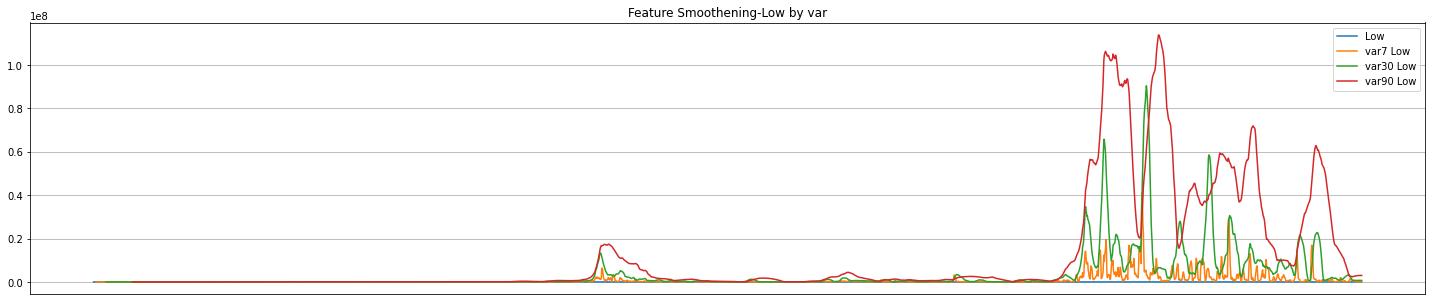

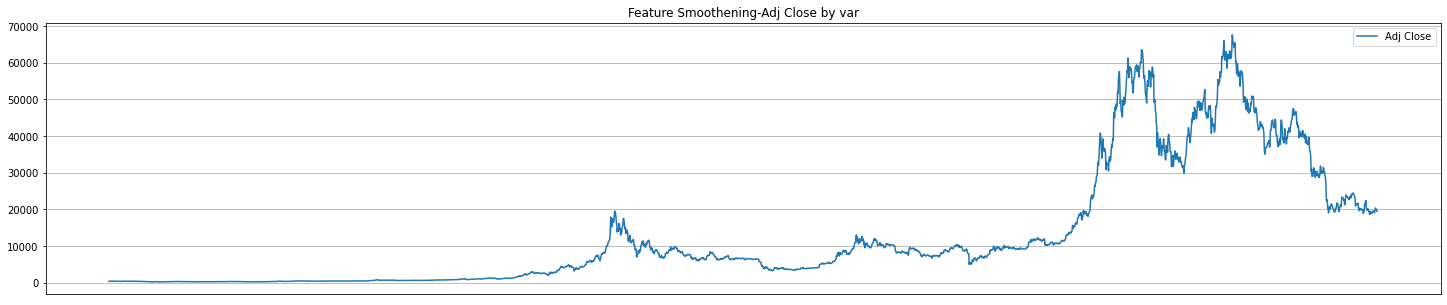

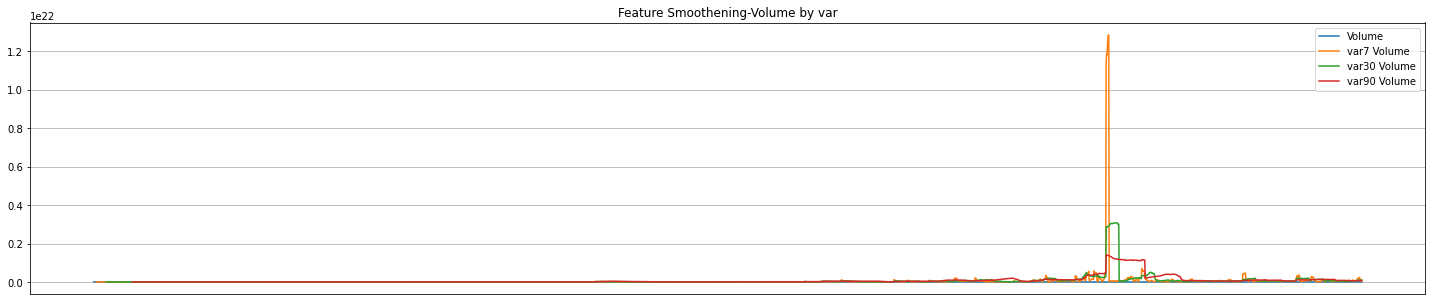

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'var',show_plot=True)

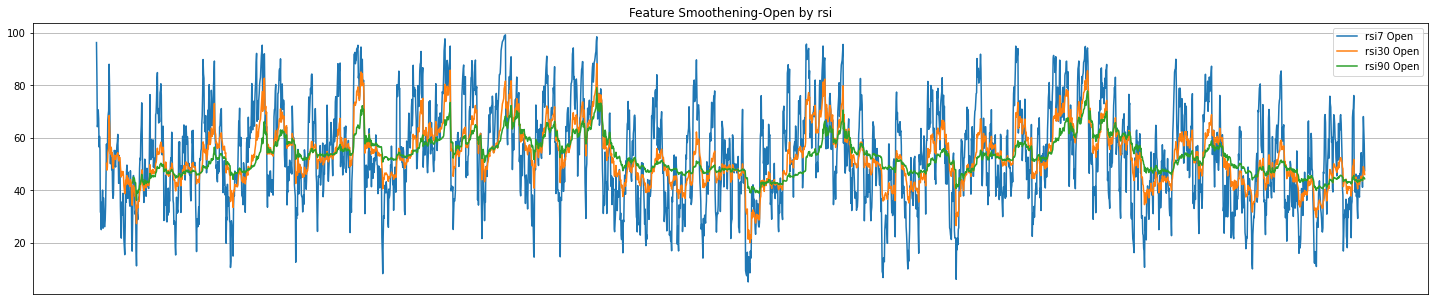

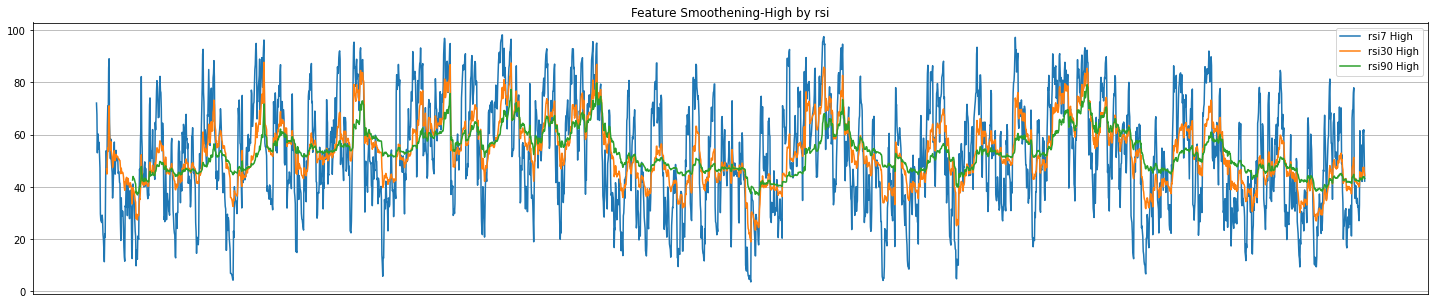

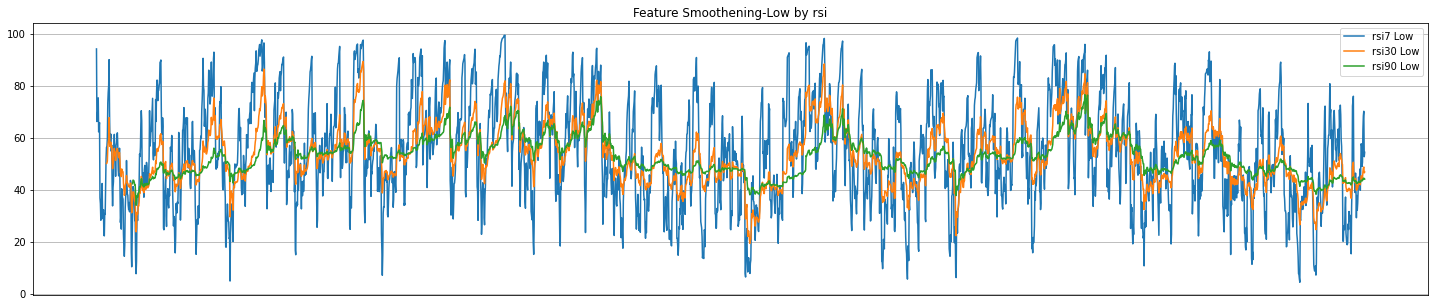

TypeError: ignored

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'rsi',show_plot=True,show_original_Feature_in_plot=False)

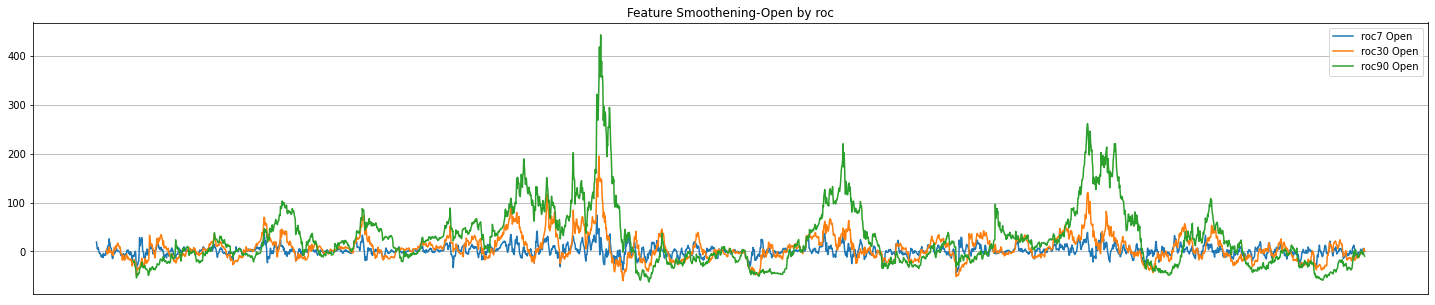

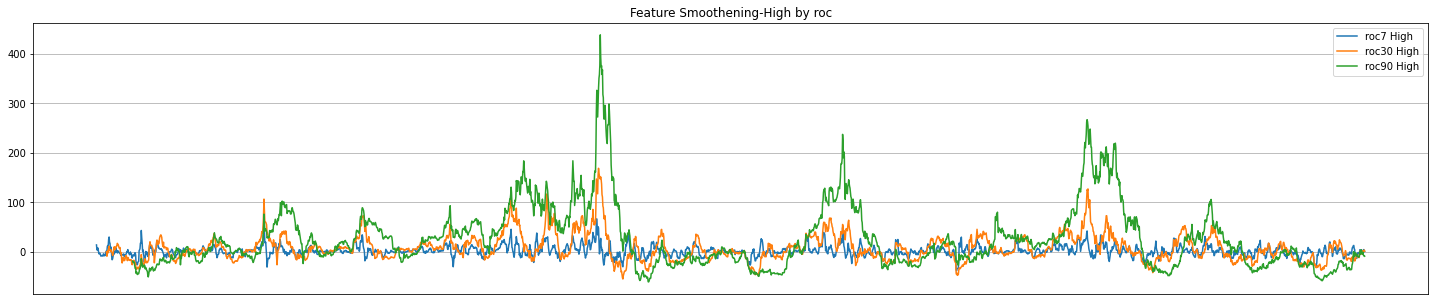

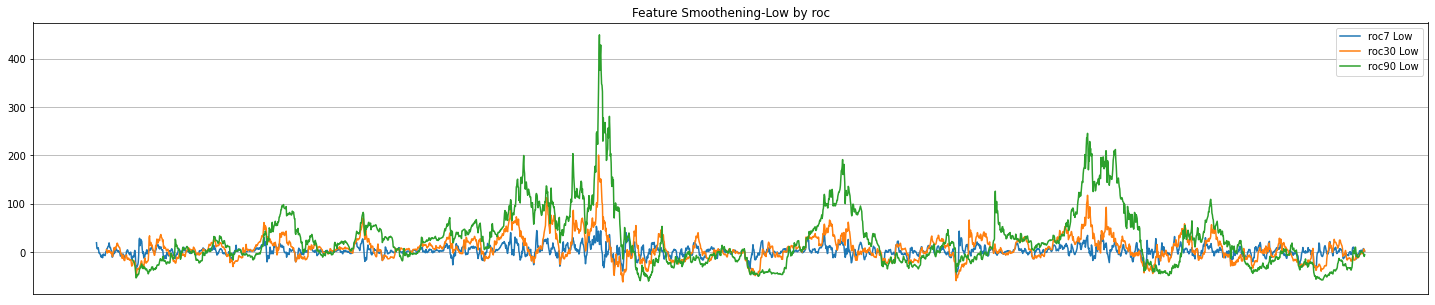

TypeError: ignored

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'roc',show_plot=True,show_original_Feature_in_plot=False)

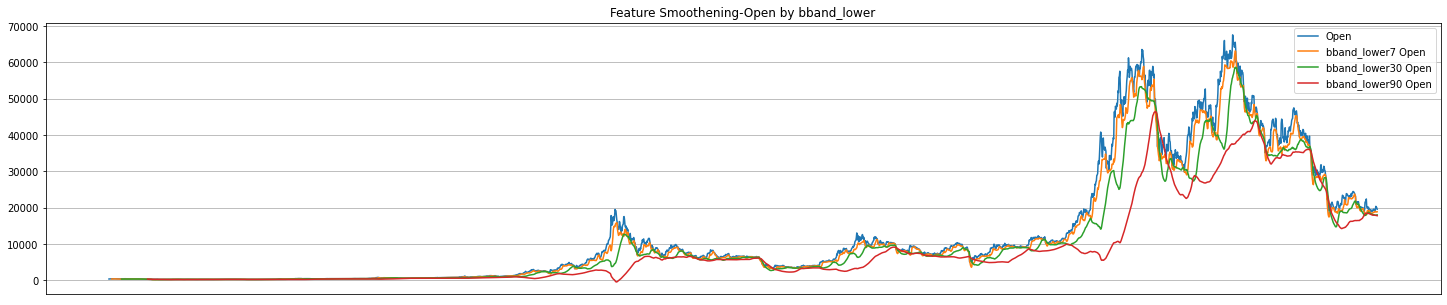

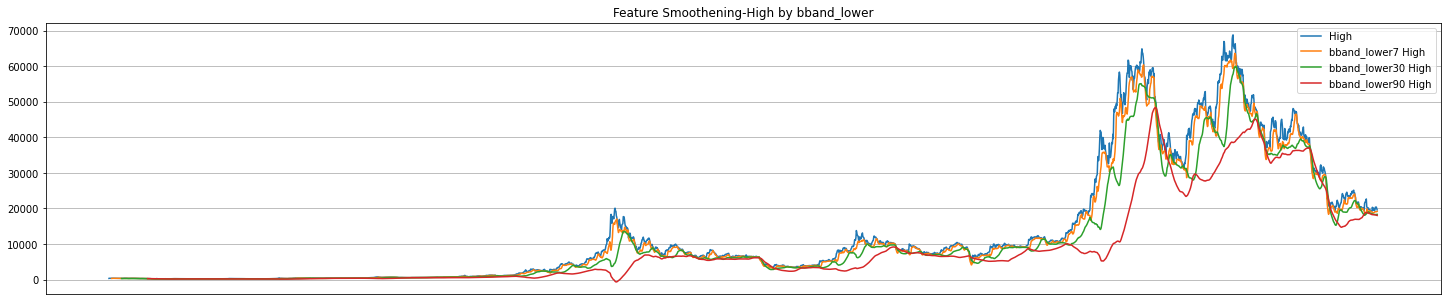

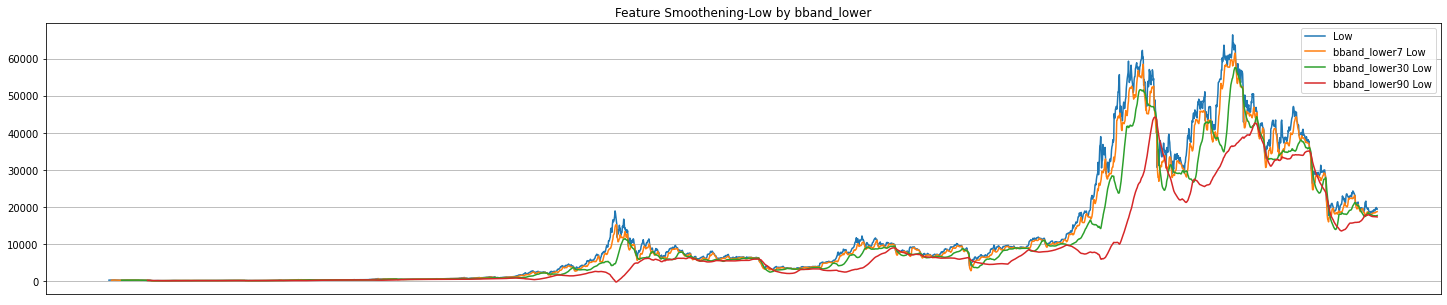

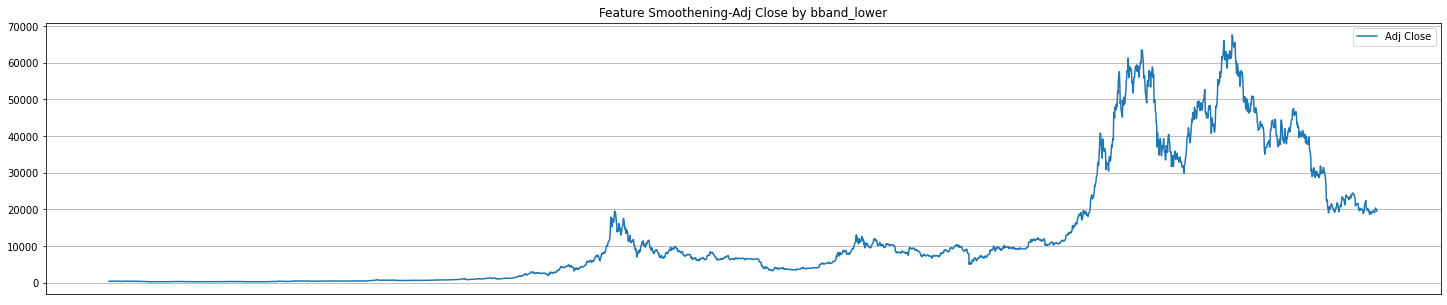

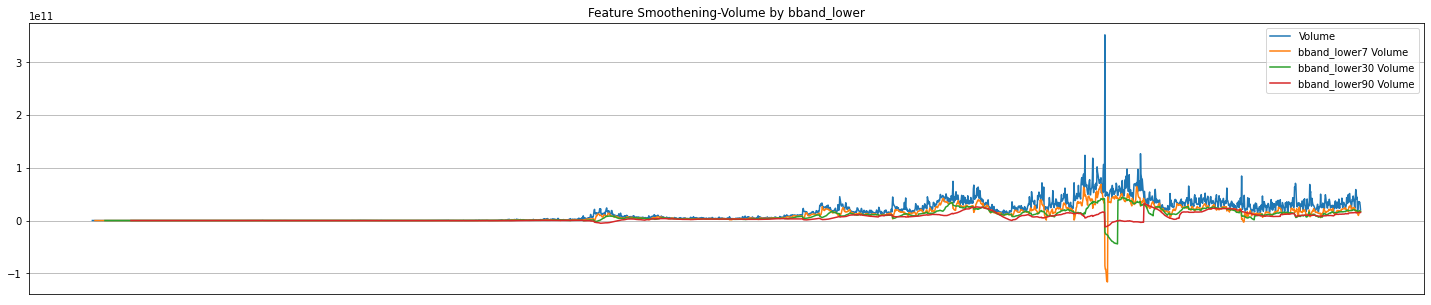

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'bband_lower',show_plot=True)

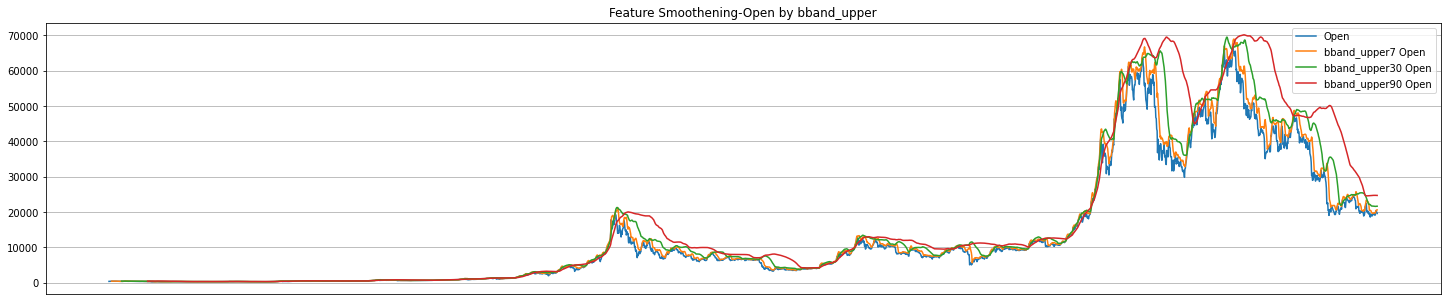

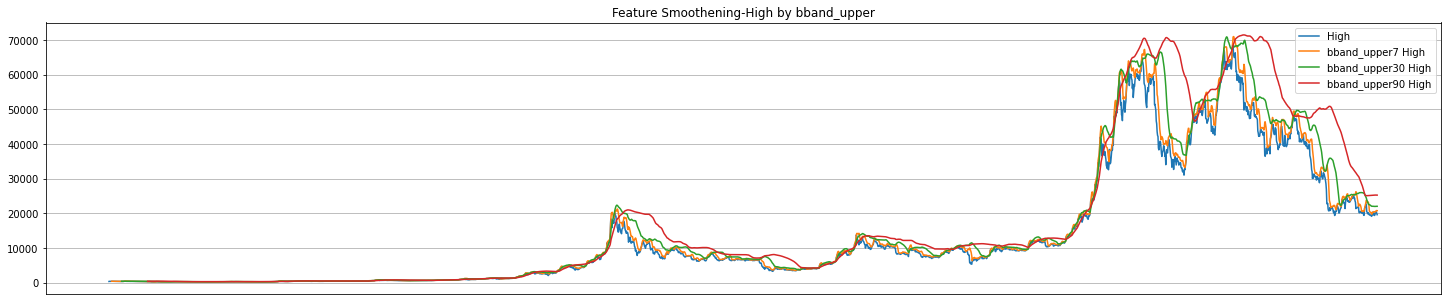

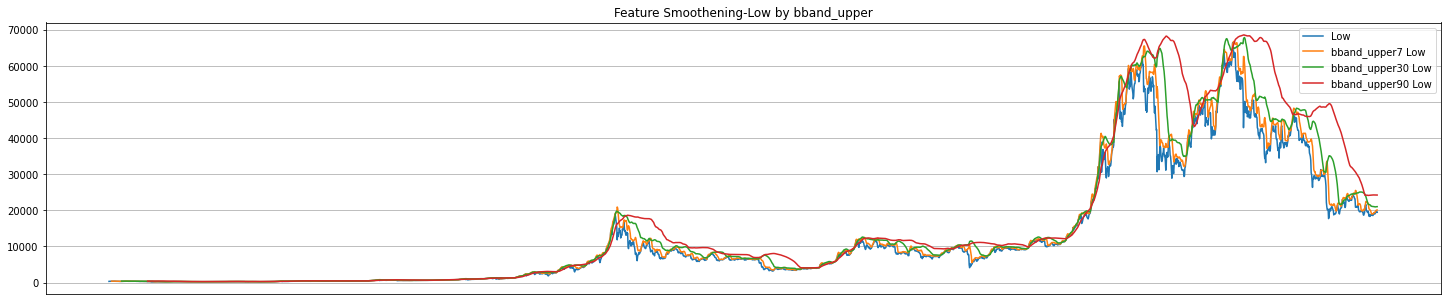

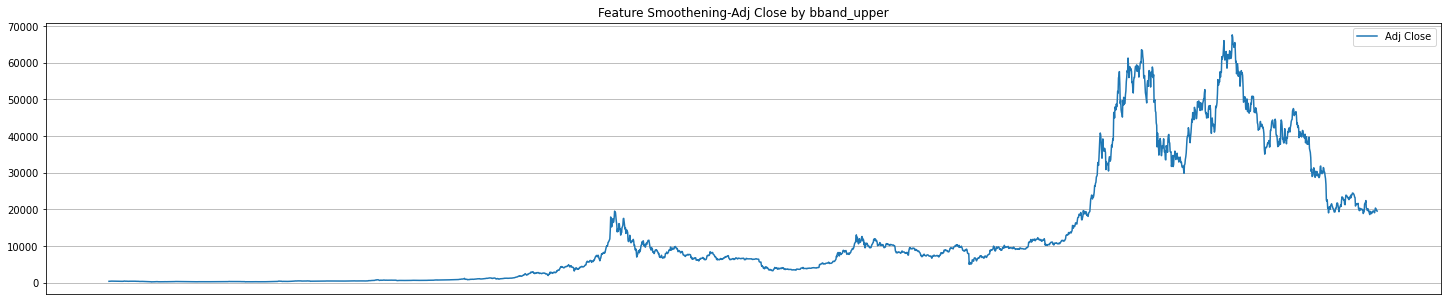

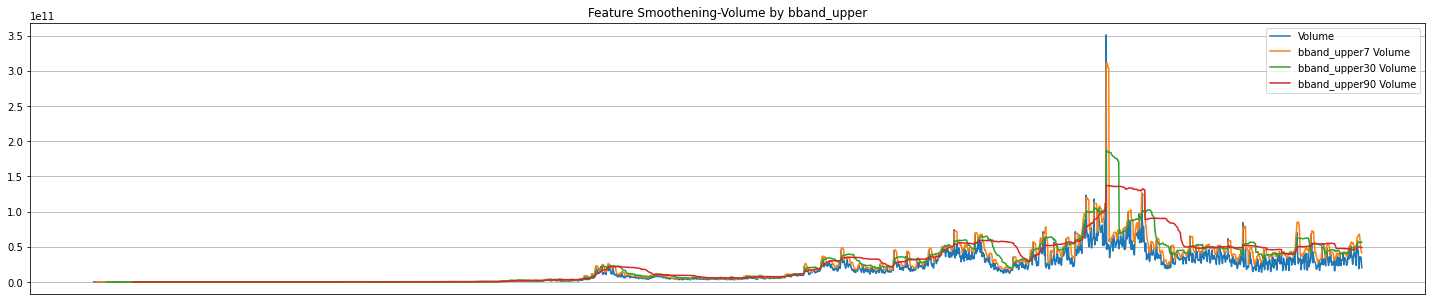

In [ ]:
for feature in feature_list:
    if feature not in ['Date','weekday', 'year', 'month','7th_day_avg_price','30th_day_avg_price','90th_day_avg_price','avg_btc_price']:
        feature_smoothening(final_df,feature,'bband_upper',show_plot=True)

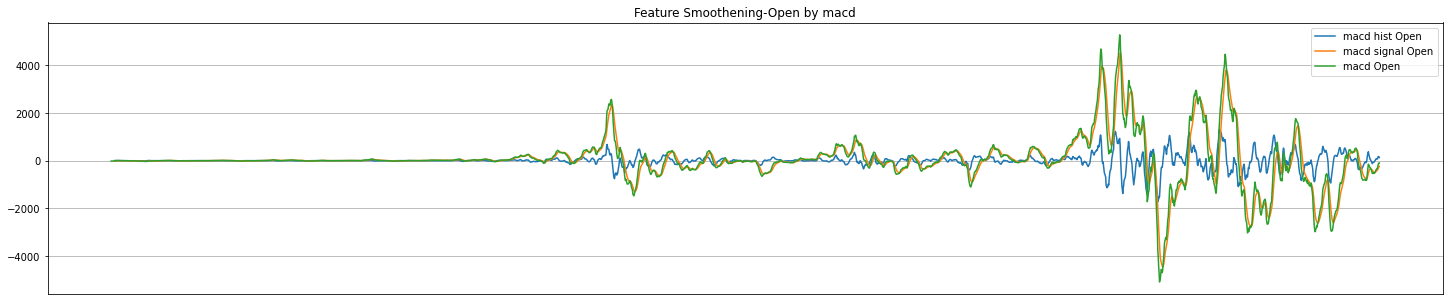

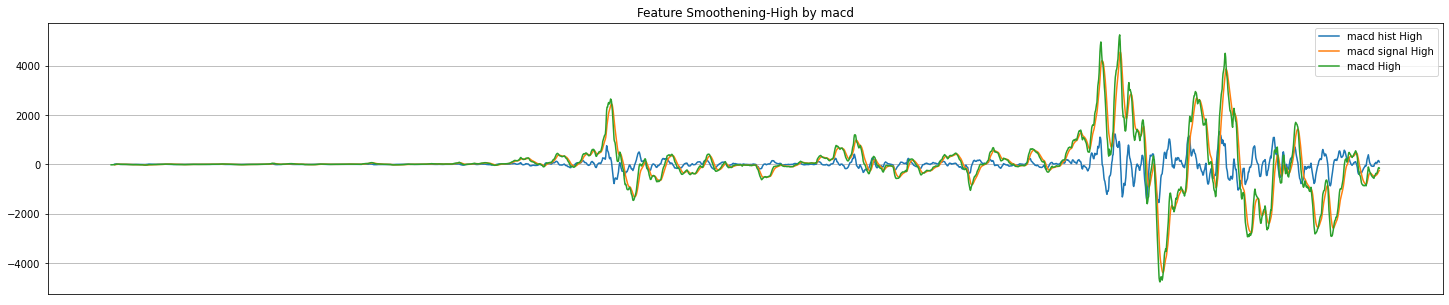

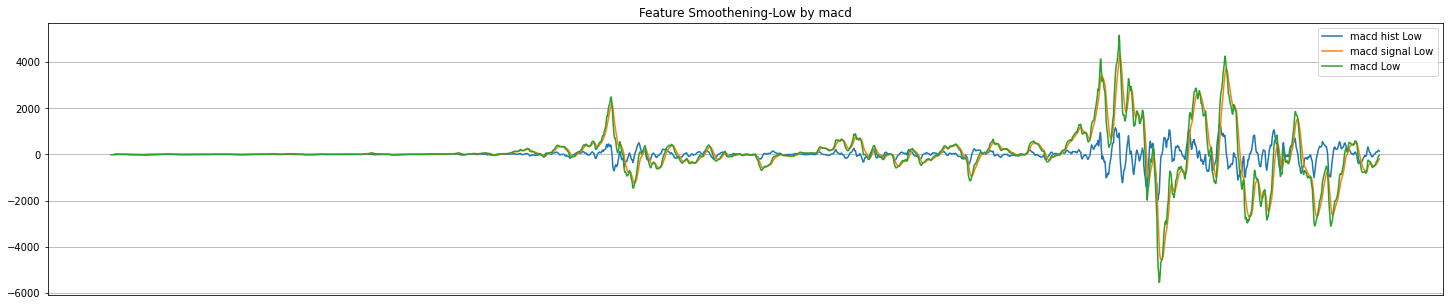

TypeError: ignored

In [ ]:
for feature in feature_list:
    feature_smoothening(final_df,feature,'macd',show_plot=True,show_original_Feature_in_plot=False)

In [ ]:
final_df = final_df[(final_df['Date'] >= '')].fillna(method='bfill')

In [ ]:
final_df.shape

(2923, 178)

In [ ]:
final_df.to_csv('BTC-USD.csv')